In [1]:
!nvidia-smi

Mon Jan  6 08:31:55 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/dataset.zip /content/

In [ ]:
!unzip -q dataset.zip -d /content/dataset

In [3]:
!pip install ultralytics roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:


from roboflow import Roboflow
rf = Roboflow(api_key="WsSQpsQb0mnRSL1qMexv")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(6)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-6 in yolov11:: 100%|██████████| 20262/20262 [00:02<00:00, 6872.26it/s]


In [7]:
dataset.location

'/content/License-Plate-Recognition-6'

In [10]:
def count_images(folder_path):
  """Counts the number of image files in a given folder.

  Args:
    folder_path: The path to the folder.

  Returns:
    The number of image files in the folder.
  """
  image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')  # Add more if needed
  image_count = 0
  for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count

# Example usage (replace with your folder path)
folder_path = "/content/License-Plate-Recognition-6/train/images"
image_count = count_images(folder_path)
print(f"Number of images in '{folder_path}': {image_count}")

Number of images in '/content/License-Plate-Recognition-6/train/images': 7057


In [11]:


!yolo task=detect mode=train model=yolo11s.pt data='/content/License-Plate-Recognition-6/data.yaml' epochs=10 imgsz=800 plots=True batch=32

100% 18.4M/18.4M [00:00<00:00, 140MB/s] 
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/License-Plate-Recognition-6/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [14]:
# prompt: zip the runs folder and download it

!zip -r /content/runs.zip /content/runs
from google.colab import files
files.download("/content/runs.zip")


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 14%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 35%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 9%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 13%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/train/labels.jpg (deflated 33%)
  adding: content/runs/detect/train/P_curve.png (deflated 21%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/PR_curve.png (deflated 24%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 33%)
  adding: content/runs/detect/train/results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

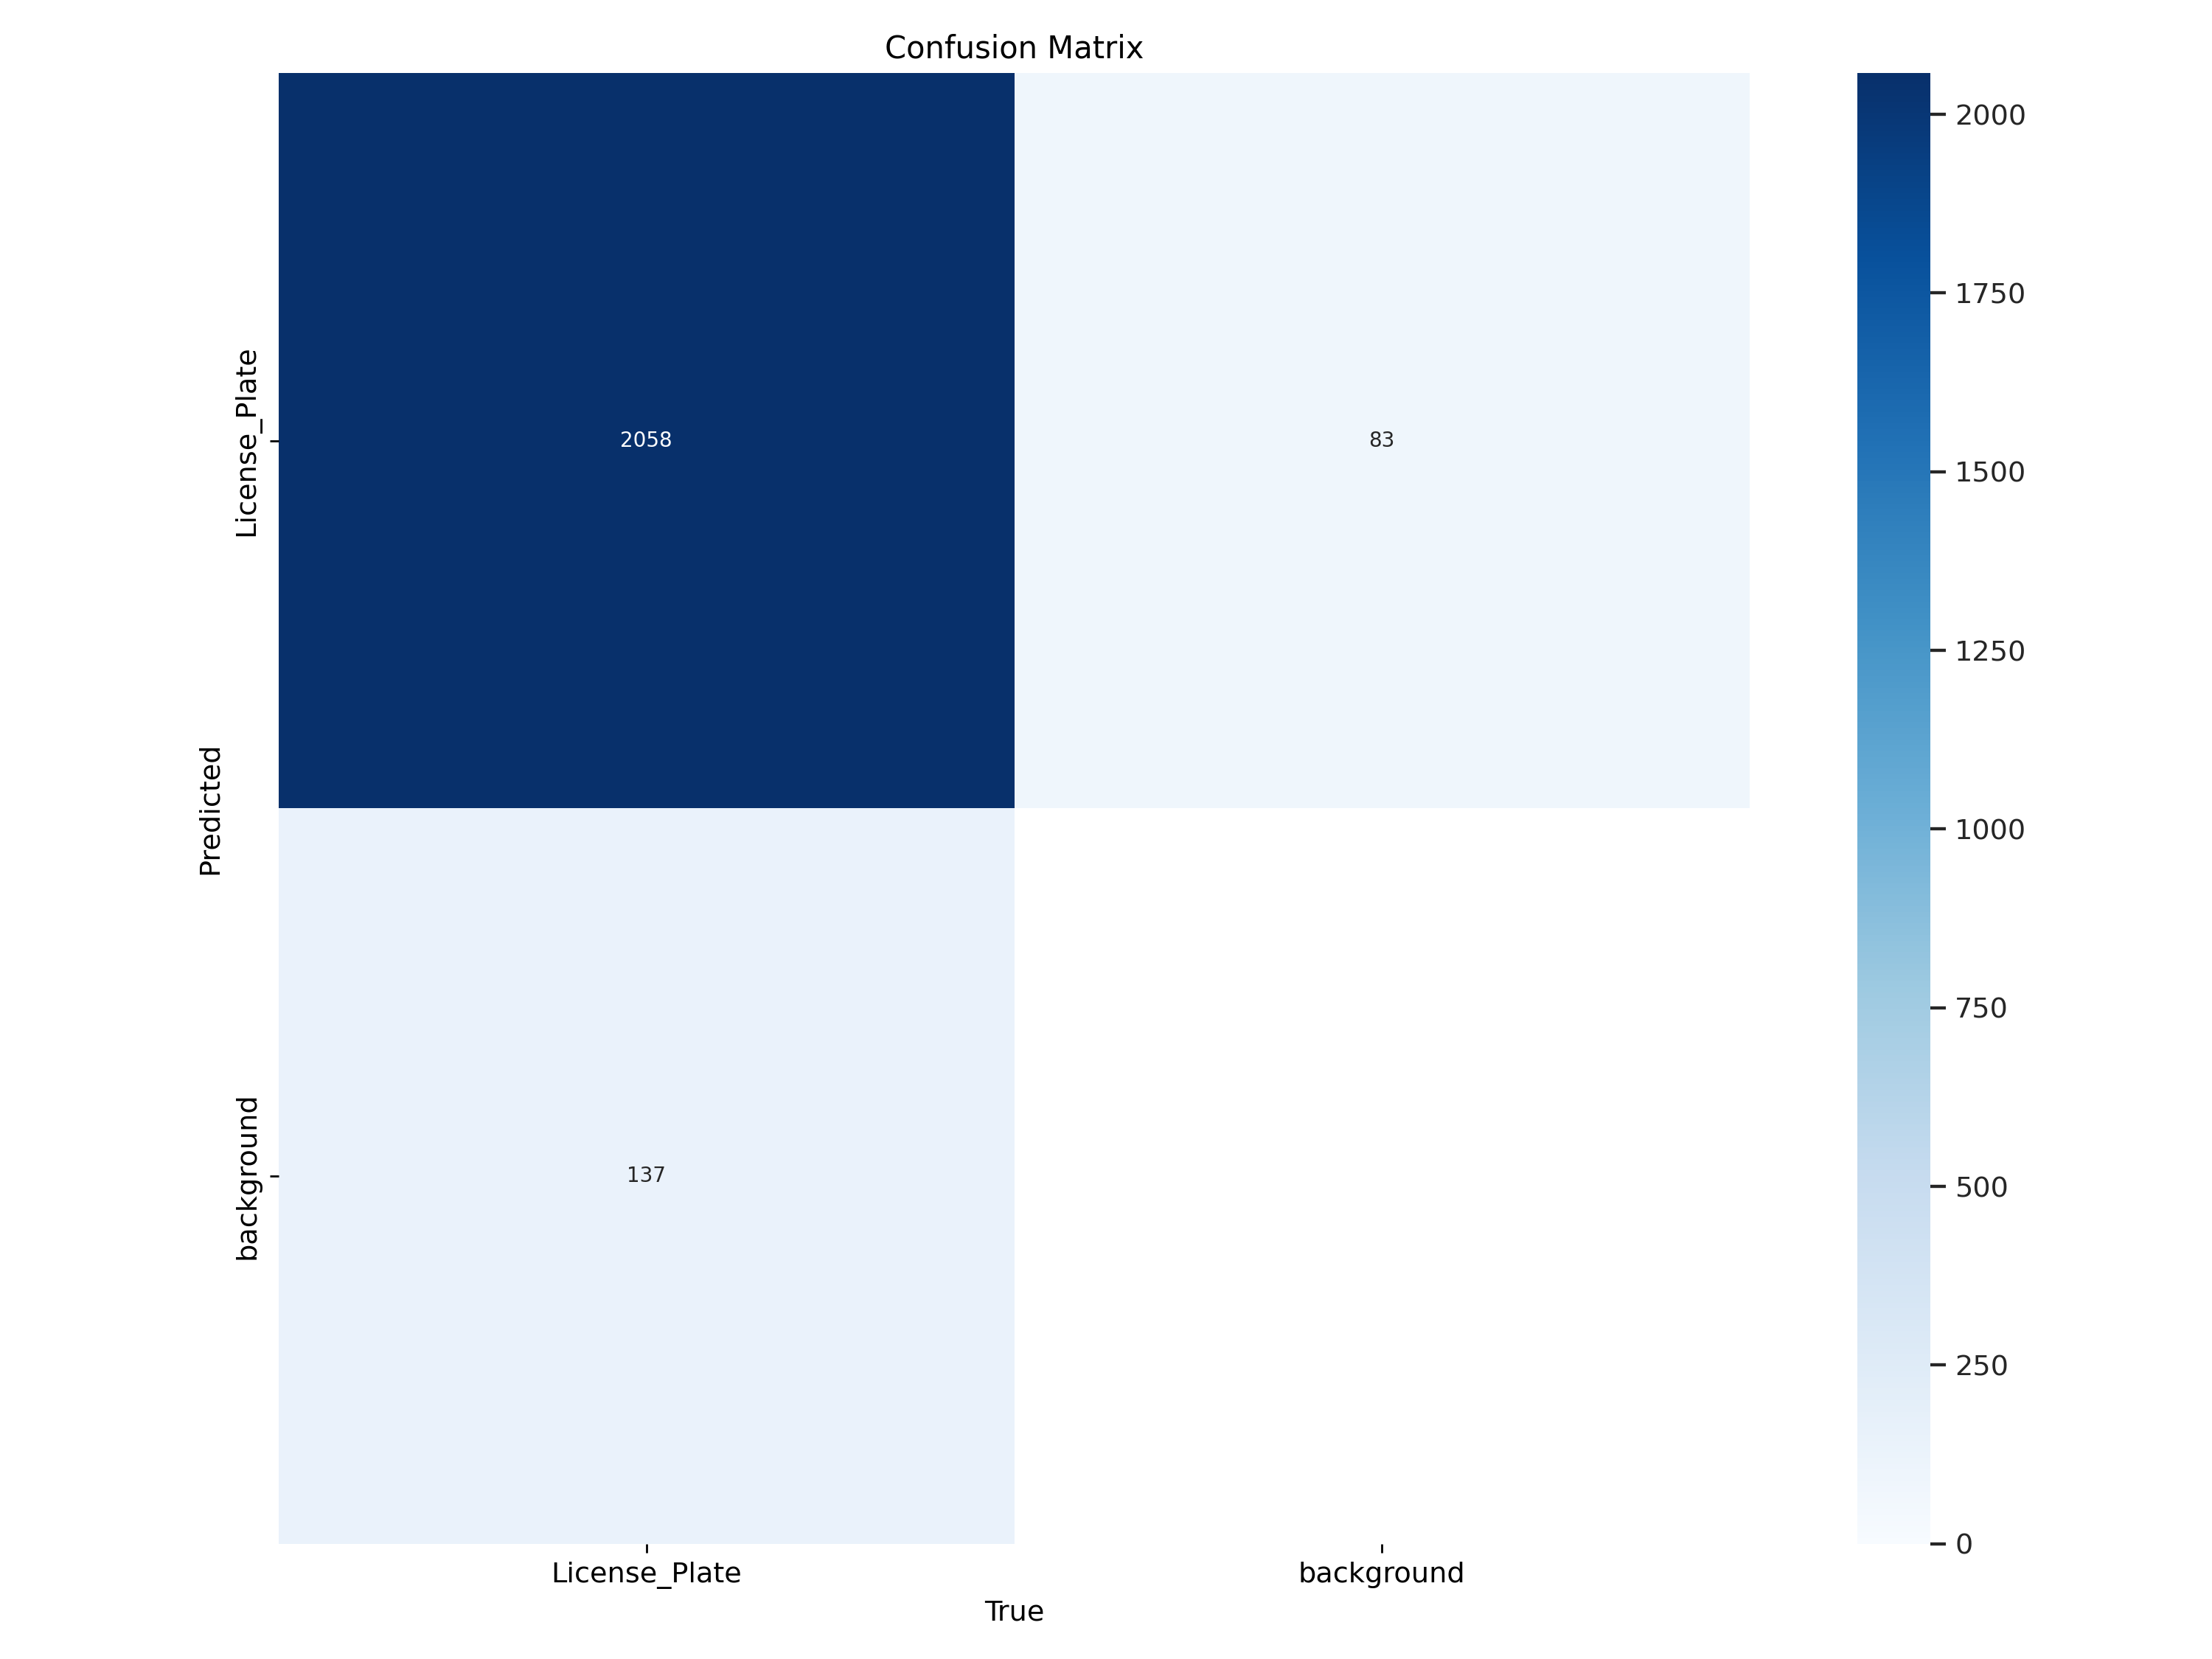

In [15]:

Image('/content/runs/detect/train/confusion_matrix.png', width=600)

In [16]:


!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/License-Plate-Recognition-6/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% 2048/2048 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:27<00:00,  4.59it/s]
                   all       2048       2195      0.981      0.923      0.961      0.667
Speed: 0.3ms preprocess, 8.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:

!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1020 /content/License-Plate-Recognition-6/test/images/0002a5b67e5f0909_jpg.rf.121aa5e78ce64985a4a39a46018ecc1c.jpg: 608x800 2 License_Plates, 45.5ms
image 2/1020 /content/License-Plate-Recognition-6/test/images/000812dcf304a8e7_jpg.rf.5ebbcba8fc15d74811ea1d4448aafc52.jpg: 704x800 1 License_Plate, 46.7ms
image 3/1020 /content/License-Plate-Recognition-6/test/images/0010f4c10f7ab07e_jpg.rf.cc3c86f283cc0b0639ec8bd14889fefe.jpg: 608x800 1 License_Plate, 17.9ms
image 4/1020 /content/License-Plate-Recognition-6/test/images/001cdd25e148cd36_jpg.rf.eb5969a3acc1a6f0841eadd71ea99b1a.jpg: 608x800 3 License_Plates, 17.3ms
image 5/1020 /content/License-Plate-Recognition-6/test/images/002519f868563098_jpg.rf.d83ae33a71fadcc99cf1689295989309.jpg: 544x800 1 License_Plate, 46.5ms
image 6/1020 /content/License-Plate-Recognition-6/t